<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q4_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
np.random.seed(0)

In [2]:
pip install openpyxl==3.0.9

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import the data from Google Drive**

In [4]:
data = pd.read_excel('/content/drive/MyDrive/data.xlsx',header=None)
print(data)

              0           1           2           3           4           5   \
0     242.751526  281.801298  250.032405  132.099709   61.166502  247.837695   
1     216.585951  297.057883  300.938478  131.358295  105.976730  273.299350   
2     265.735536  339.271134  269.817305  102.304781   83.869539  281.962656   
3     207.631953  255.284282  254.563071  229.883639   87.492384  303.314846   
4     205.016124  333.265999  536.342842  106.237587  155.700409  272.692251   
...          ...         ...         ...         ...         ...         ...   
3407  723.913528  343.529660  360.468834  233.711682  177.309124  717.744261   
3408  466.593370  215.858228  235.940729  309.475340  126.789443  333.123293   
3409  446.227198  219.936910  181.605753  160.483773  106.179660  416.263221   
3410  511.406437  215.379710  170.598957   89.543149   73.107090  457.783309   
3411  757.967516  268.431243  189.755280  156.957408  126.298293  835.417941   

              6           7           8

In [5]:
# Read the data
datan = data.values

X = datan[:, 0:60]
m = X.shape[0]
print(m)


# Normalise X
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
print(X.shape)

# Normalise Y
y=datan[:, 60]
y = y - 1
print(y.shape)

3412
(3412, 60)
(3412,)


### **Defining the requisite functions**

Each function has a l2 parameter that allows us to choose between L1 and L2 norm regularisation with this flag. If the value of lambda is 0, there is no regularisation irrespective of the flag value

In [6]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z)) ###activation function

In [7]:
def cost_function(X,y,w, lamb, l2 = True): 
    hypothesis = sigmoid(np.dot(X,w.T)) 
    if l2:
        J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) + (lamb/2)*np.sum(np.abs(w)**2) 
    else:
        J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) + (lamb/2)*np.sum(np.abs(w)) 
    return J

In [8]:
def batch_gradient_descent(X,y,w,alpha,iters, lamb, l2 = True):
    cost_history = np.zeros(iters) 
    for i in range(iters):
        hypothesis = sigmoid(np.dot(X,w.T))
        if l2:
            w = w - (alpha/len(y)) * np.dot(hypothesis - y, X) - (alpha*lamb)*w
        else:
            w = w - (alpha/len(y)) * np.dot(hypothesis - y, X) - ((alpha*lamb)/2)*np.sign(w)
        cost_history[i] = cost_function(X,y,w, lamb)
    return w,cost_history

In [9]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size, lamb, l2 = True):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        if l2:
            w = w - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y)) - (alpha*lamb)*w
        else:
            w = w - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y)) - ((alpha*lamb)/2)*np.sign(w)
        cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
    return w, cost_history

In [10]:
def stochastic_gradient_descent(X,y,w,alpha, iters, lamb, l2 = True):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        if l2:
            w = w - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y)) - (alpha*lamb)*w
        else:
            w = w - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y)) - ((alpha*lamb)/2)*np.sign(w)
        cost_history[i] = cost_function(ind_x,ind_y,w, lamb)
    return w, cost_history

### Holdout Validation
Splitting the data into 3 sets, 70% training, 20% test and 10% validation

In [11]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3)
print(x_train.shape)
print(x_test1.shape)

(2388, 60)
(1024, 60)


In [12]:
x_test, x_val, y_test, y_val = train_test_split(x_test1, y_test1, test_size=0.33)
print(x_test.shape)
print(x_val.shape)

(686, 60)
(338, 60)


In [13]:
f = lambda x: 1 if(x == 0) else 0

In [14]:
squares = np.array([f(x) for x in y_train])

In [15]:
# Seperating the data into 4 sets.
# Each set has the value corresponding to k set to 1 and the rest 0.

cases = []
cases_t = []

for k in range(4):
  f = lambda x: 1 if(x == k) else 0
  y_tr = np.array([f(x) for x in y_train])
  y_te = np.array([f(x) for x in y_test])
  print(y_tr)
  cases.append(y_tr)
  cases_t.append(y_te)

[1 1 1 ... 0 0 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 1]


In [16]:
# define the required weights
# The four different weights for the four different models required by the One-vs-All classifier
# Or the six different weights for the one-vs-one classifier

def prep(n):
    weights = []
    for k in range(n):
        weights.append(np.random.randn(1,X.shape[1]).ravel())
        
    return weights

In [17]:
# the actual training function
def train(x_train, weights, cases, alpha, iters, lamb, batch_size, func, l2 = True):
    for k in range(len(cases)):
        if func == MB_gradient_descent:
            calc_w,J_his = func(x_train, cases[k], weights[k], alpha, iters, batch_size, lamb, l2)
        else:
            calc_w,J_his = func(x_train, cases[k], weights[k], alpha, iters, lamb, l2)
        weights[k] = calc_w
    return (weights, J_his)

In [18]:
def show_plot(iters, J_his):
    plt.plot(range(iters),J_his)
    plt.show()

In [19]:
def make_pred(weights, x_val):
    Y_Pred = []
    for k in range(len(weights)):
        z = np.dot(x_val, weights[k].T)
        h = sigmoid(z)
        y_pred=h>0.5
        y_pred=y_pred.astype(int)
        Y_Pred.append(y_pred)
    return Y_Pred

In [20]:
def get_accuracy(Y_Pred, y_val):
    Y_Pred = np.array(Y_Pred).T
    max = np.argmax(Y_Pred, axis=1)
    cm=confusion_matrix(y_val, max)
    accuracy=(cm[0][0]+cm[1][1])/(len(y_val))
    return accuracy

In [21]:
def run_all_functions_and_reg(alpha, iters, lamb, batch_size, show_plots):
    for func in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
        for j in range(3): # 3 kinds of regularisation
            accuracy = 0
            if j == 0: ## no regularisation
                lamb = 0
                weights = prep(4)
                training_output = train(x_train, weights, cases, alpha, iters, lamb, batch_size, func, l2 = True)
                Y_Pred = make_pred(training_output[0], x_val)
                accuracy = get_accuracy(Y_Pred, y_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))
            elif j == 1: ## l2 reg
                weights = prep(4)
                training_output = train(x_train, weights, cases, alpha, iters, lamb, batch_size, func, l2 = True)
                Y_Pred = make_pred(training_output[0], x_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " and L2 at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))
            else: ## l1 reg
                weights = prep(4)
                training_output = train(x_train, weights, cases, alpha, iters, lamb, batch_size, func, l2 = False)
                Y_Pred = make_pred(training_output[0], x_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " and L1 at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))

            return (accuracy, alpha, iters, lamb, batch_size, func)

In the following cell, we run 2,025 combinations to find the optimal value for the parameters: alpha, lambda, iterations, and batch size

In [23]:
alphas=[0.01, 0.02, 0.05] ##learning rate
iterss=[2000, 5000, 10000] ###iterations
lambs = [0.1, 0.2, 0.5]
batch_sizes = [500, 1000, 1500]

current_accuracy = 0
current_alpha = 0
current_iters = 0
current_lamb = 0
current_batch_size = 0
current_algo = ""

for alpha in alphas:
    for iters in iterss:
        for lamb in lambs:
            for batch_size in batch_sizes:
                # (r_accuracy, r_alpha, r_iters, r_lamb, r_batch_size)
                output = run_all_functions_and_reg(alpha, iters, lamb, batch_size, False)
                if output[0] >= current_accuracy:
                  current_accuracy = output[0]
                  current_alpha = output[1]
                  current_iters = output[2]
                  current_lamb = output[3]
                  current_batch_size = output[4]
                  current_algo = str(output[5])

Accuracy 0.28106508875739644 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0
Accuracy 0.26627218934911245 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0
Accuracy 0.26331360946745563 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0
Accuracy 0.28106508875739644 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0
Accuracy 0.2692307692307692 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0


KeyboardInterrupt: ignored

# **One-vs-One Classification**

In [24]:
# First let's read the input data again
data = pd.read_excel('/content/drive/MyDrive/data.xlsx',header=None)
print(data)

              0           1           2           3           4           5   \
0     242.751526  281.801298  250.032405  132.099709   61.166502  247.837695   
1     216.585951  297.057883  300.938478  131.358295  105.976730  273.299350   
2     265.735536  339.271134  269.817305  102.304781   83.869539  281.962656   
3     207.631953  255.284282  254.563071  229.883639   87.492384  303.314846   
4     205.016124  333.265999  536.342842  106.237587  155.700409  272.692251   
...          ...         ...         ...         ...         ...         ...   
3407  723.913528  343.529660  360.468834  233.711682  177.309124  717.744261   
3408  466.593370  215.858228  235.940729  309.475340  126.789443  333.123293   
3409  446.227198  219.936910  181.605753  160.483773  106.179660  416.263221   
3410  511.406437  215.379710  170.598957   89.543149   73.107090  457.783309   
3411  757.967516  268.431243  189.755280  156.957408  126.298293  835.417941   

              6           7           8

In [25]:
datan = data.values

In [26]:
# We now need 4C2 since there are 4 classes and one-vs-one needs combinations of two classes at a time

arrays = [] # we will store the 6 arrays in this list
combinations = []

# possible classes
a_list = [1, 2, 3, 4] 

# array of all possible combinations
import itertools
all_combinations = []
for r in [2]:
    combinations_object = itertools.combinations(a_list, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list

print(all_combinations)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [27]:
# print(.shape)
print(datan[(3<datan[:,60]) & (datan[:,60]<5)].shape)
print(datan[(-1<datan[:,60]) & (datan[:,60]<2)].shape)
ar = np.concatenate([datan[(3<datan[:,60]) & (datan[:,60]<5)], datan[(-1<datan[:,60]) & (datan[:,60]<2)]])
print(ar.shape)

(851, 61)
(851, 61)
(1702, 61)


In [28]:
array12 = np.concatenate([datan[(0<datan[:,60]) & (datan[:,60]<2)], datan[(1<datan[:,60]) & (datan[:,60]<3)]]) # classes 1 and 2
print(array12.shape)
arrays.append(array12)

array13 = np.concatenate([datan[(0<datan[:,60]) & (datan[:,60]<2)], datan[(2<datan[:,60]) & (datan[:,60]<4)]]) # classes 1 and 3
print(array13.shape)
arrays.append(array13)

array14 = np.concatenate([datan[(0<datan[:,60]) & (datan[:,60]<2)], datan[(3<datan[:,60]) & (datan[:,60]<5)]]) # classes 1 and 4
print(array14.shape)
arrays.append(array14)

array23 = np.concatenate([datan[(1<datan[:,60]) & (datan[:,60]<3)], datan[(2<datan[:,60]) & (datan[:,60]<4)]]) # classes 2 and 3
print(array23.shape)
arrays.append(array23)

array24 = np.concatenate([datan[(1<datan[:,60]) & (datan[:,60]<3)], datan[(3<datan[:,60]) & (datan[:,60]<5)]]) # classes 2 and 4
print(array24.shape)
arrays.append(array24)

array34 = np.concatenate([datan[(2<datan[:,60]) & (datan[:,60]<4)], datan[(3<datan[:,60]) & (datan[:,60]<5)]]) # classes 3 and 4
print(array34.shape)
arrays.append(array34)

# print(arrays)

(1706, 61)
(1706, 61)
(1702, 61)
(1710, 61)
(1706, 61)
(1706, 61)


In [29]:
# Sort the data

sorted_data = []

for k in range(len(all_combinations)):
  # Read the data
  X = arrays[k][:, 0:60]
  m = X.shape[0]
  print(m)

  # Normalise X
  xmin = np.min(X, axis = 0)
  xmax = np.max(X, axis = 0)
  X = (X-xmin)/(xmax - xmin)
  print(X.shape)

  # Normalise Y
  y=arrays[k][:, 60]
  print(y.shape)

  x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3)
  print(x_train.shape)
  print(x_test1.shape)

  x_test, x_val, y_test, y_val = train_test_split(x_test1, y_test1, test_size=0.33)
  print(x_test.shape)
  print(x_val.shape)

  sorted_data.append([x_train, y_train, x_test, y_test, x_val, y_val])

1706
(1706, 60)
(1706,)
(1194, 60)
(512, 60)
(343, 60)
(169, 60)
1706
(1706, 60)
(1706,)
(1194, 60)
(512, 60)
(343, 60)
(169, 60)
1702
(1702, 60)
(1702,)
(1191, 60)
(511, 60)
(342, 60)
(169, 60)
1710
(1710, 60)
(1710,)
(1197, 60)
(513, 60)
(343, 60)
(170, 60)
1706
(1706, 60)
(1706,)
(1194, 60)
(512, 60)
(343, 60)
(169, 60)
1706
(1706, 60)
(1706,)
(1194, 60)
(512, 60)
(343, 60)
(169, 60)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


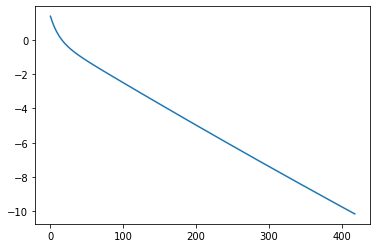

In [30]:
weights = prep(6)

alpha = 0.01
iters = 100000
lamb = 0.01

batch_w, J_his = batch_gradient_descent(sorted_data[0][0], sorted_data[0][1], weights[0], alpha, iters, lamb, l2 = True)
show_plot(iters, J_his)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


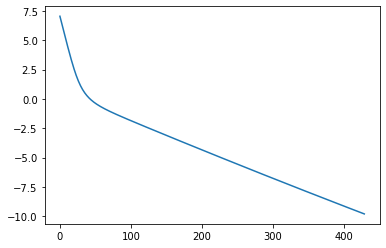

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


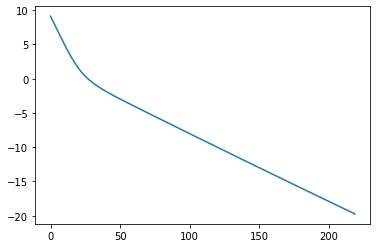

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


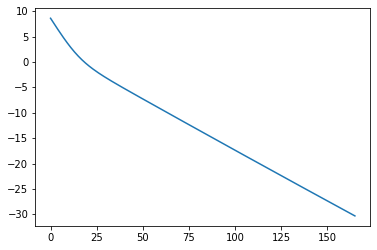

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


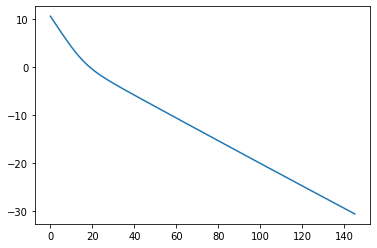

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


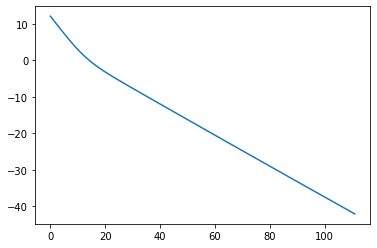

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


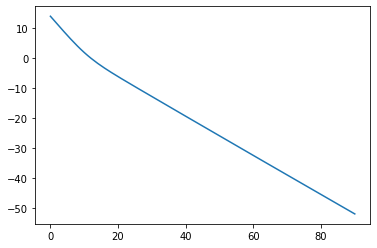

In [31]:
weights = prep(6)

alpha = 0.01
iters = 1000
lamb = 0.01

resultants = []

for k in range(len(weights)):
  batch_w, J_his = batch_gradient_descent(sorted_data[k][0], sorted_data[k][1], weights[0], alpha, iters, lamb, l2 = True)
  show_plot(iters, J_his)
  resultants.append(batch_w)

In [38]:
# the actual training function
def train(x_train, weights, y_train, alpha, iters, lamb, batch_size, func, l2 = True):
    if func == MB_gradient_descent:
      calc_w,J_his = func(x_train, y_train, weights[k], alpha, iters, batch_size, lamb, l2)
    else:
      calc_w,J_his = func(x_train, y_train, weights[k], alpha, iters, lamb, l2)
      weights[k] = calc_w
    return (weights, J_his)

In [39]:
def run_all_functions_and_reg(x_train, y_train, y_val, weights, alpha, iters, lamb, batch_size, show_plots):
    for func in [batch_gradient_descent, MB_gradient_descent, stochastic_gradient_descent]: # three algos
        for j in range(3): # 3 kinds of regularisation
            accuracy = 0
            if j == 0: ## no regularisation
                lamb = 0
                weights = prep(6)
                training_output = train(x_train, weights, y_train, alpha, iters, lamb, batch_size, func, l2 = True)
                Y_Pred = make_pred(training_output[0], x_val)
                accuracy = get_accuracy(Y_Pred, y_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))
            elif j == 1: ## l2 reg
                weights = prep(6)
                training_output = train(x_train, weights, y_train, alpha, iters, lamb, batch_size, func, l2 = True)
                Y_Pred = make_pred(training_output[0], x_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " and L2 at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))
            else: ## l1 reg
                weights = prep(6)
                training_output = train(x_train, weights, y_train, alpha, iters, lamb, batch_size, func, l2 = False)
                Y_Pred = make_pred(training_output[0], x_val)
                if show_plots:
                    show_plot(iters, training_output[1])
                print("Accuracy " + str(accuracy) + " with " + str(func) + " and L1 at alpha " + str(alpha) + " at iters " + str(iters) + " at lamb " + str(lamb))

            return (accuracy, alpha, iters, lamb, batch_size, func)

In [42]:
alphas=[0.01, 0.02] ##learning rate
iterss=[2000, 5000] ###iterations
lambs = [0.1, 0.2]
batch_sizes = [1000, 1500]

current_accuracy = 0
current_alpha = 0
current_iters = 0
current_lamb = 0
current_batch_size = 0
current_algo = ""

for k in range(len(weights)):
  for alpha in alphas:
      for iters in iterss:
          for lamb in lambs:
              for batch_size in batch_sizes:
                  # x_train, y_train, y_val, weights, alpha, iters, lamb, batch_size, show_plots
                  x_train = sorted_data[k][0]
                  y_train = sorted_data[k][1]
                  y_val = sorted_data[k][5]
                  output = run_all_functions_and_reg(x_train, y_train, y_val, weights[k], alpha, iters, lamb, batch_size, False)
                  if output[0] >= current_accuracy:
                    current_accuracy = output[0]
                    current_alpha = output[1]
                    current_iters = output[2]
                    current_lamb = output[3]
                    current_batch_size = output[4]
                    current_algo = str(output[5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 5000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 5000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 5000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.01 at iters 5000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.02 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.02 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy 0.0 with <function batch_gradient_descent at 0x7f827f851710> at alpha 0.02 at iters 2000 at lamb 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


KeyboardInterrupt: ignored